In [3]:
import pandas as pd
from database_utils import DatabaseConnector as dc

import numpy as np
import nbformat
import plotly.express as px
import missingno as msno


database_connector = dc()
credentials = database_connector.read_db_creds('db_creds.yaml')
engine,_ = database_connector.init_db_engine(credentials)

# Import data from 'orders_table' table into DataFrame
orders_table_df = pd.read_sql('orders_table', engine)

# Display the DataFrame
display(orders_table_df)


,level_0,index,date_uuid,first_name,last_name,user_uuid,card_number,store_code,product_code,1,product_quantity
0,0,0,9476f17e-5d6a-4117-874d-9cdb38ca1fa6,None,None,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8,30060773296197,BL-8387506C,R7-3126933h,NaN,3
1,1,1,0423a395-a04d-4e4a-bd0f-d237cbd5a295,None,None,8fe96c3a-d62d-4eb5-b313-cf12d9126a49,349624180933183,WEB-1388012W,C2-7287916l,NaN,2
2,2,2,65187294-bb16-4519-adc0-787bbe423970,None,None,fc461df4-b919-48b2-909e-55c95a03fe6b,3529023891650490,CH-01D85C8D,S7-1175877v,NaN,2
3,3,3,579e21f7-13cb-436b-83ad-33687a4eb337,None,None,6104719f-ef14-4b09-bf04-fb0c4620acb0,213142929492281,CL-C183BE4B,D8-8421505n,NaN,2
4,4,4,00ab86c3-2039-4674-b9c1-adbcbbf525bd,None,None,9523a6d3-b2dd-4670-a51a-36aebc89f579,502067329974,SO-B5B9CB3B,B6-2596063a,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
120118,110549,110548,f0e8fff6-9998-4661-954b-0e258e09d33c,None,None,95c74b0a-d495-4359-b1c0-e2da511e8403,575421945446,KA-FA7ED3B8,C9-6827622o,NaN,4
120119,82164,82164,1c80940a-d186-4ba9-9daa-8abd1aceae32,None,None,5d6fa6fe-e583-4baf-8bbb-d1dd6e2b551f,4971858637664481,WA-A41DA979,I0-1146408B,NaN,1
120120,97599,97599,58598aca-049c-418e-8e39-46327634a7f1,Sharon,Miller,48b7f1fc-db13-4611-ad8e-3dac0b759488,4971858637664481,WEB-1388012W,A4-5443400b,NaN,4
120121,106591,106591,3a76f661-0707-4fbc-9862-f21d3249f581,None,None,51c0b538-7ded-4697-8e84-9f7aa13f9112,4971858637664481,SO-6D328417,E9-2782979e,NaN,4


In [4]:
# Make a copy of the DataFrame
orders_table_df_original = orders_table_df.copy()

print("Display the DataFrame:\n")
display(orders_table_df.info())
display(orders_table_df.describe(include='all'))

Display the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120123 entries, 0 to 120122
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   level_0           120123 non-null  int64  
 1   index             120123 non-null  int64  
 2   date_uuid         120123 non-null  object 
 3   first_name        15284 non-null   object 
 4   last_name         15284 non-null   object 
 5   user_uuid         120123 non-null  object 
 6   card_number       120123 non-null  int64  
 7   store_code        120123 non-null  object 
 8   product_code      120123 non-null  object 
 9   1                 0 non-null       float64
 10  product_quantity  120123 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 10.1+ MB


None

,level_0,index,date_uuid,first_name,last_name,user_uuid,card_number,store_code,product_code,1,product_quantity
count,120123.00000,120123.00000,120123,15284,15284,120123,1.201230e+05,120123,120123,0.0,120123.000000
unique,NaN,NaN,120123,2162,1176,15284,NaN,441,1846,NaN,NaN
top,NaN,NaN,9476f17e-5d6a-4117-874d-9cdb38ca1fa6,Michael,Smith,745a4046-3437-4a58-a307-9c88485f45f8,NaN,WEB-1388012W,o6-5904385r,NaN,NaN
freq,NaN,NaN,1,57,340,21,NaN,26957,92,NaN,NaN
mean,60061.00000,60061.00000,NaN,NaN,NaN,NaN,3.902612e+17,NaN,NaN,NaN,4.010772
std,34676.66753,34676.66753,NaN,NaN,NaN,NaN,1.265590e+18,NaN,NaN,NaN,3.150723
min,0.00000,0.00000,NaN,NaN,NaN,NaN,6.046911e+08,NaN,NaN,NaN,1.000000
25%,30030.50000,30030.50000,NaN,NaN,NaN,NaN,3.681678e+13,NaN,NaN,NaN,2.000000
50%,60061.00000,60061.00000,NaN,NaN,NaN,NaN,3.503965e+15,NaN,NaN,NaN,3.000000
75%,90091.50000,90091.50000,NaN,NaN,NaN,NaN,4.603236e+15,NaN,NaN,NaN,5.000000


In [5]:
print("Check how many missing values each column has:\n")
orders_table_df_null = orders_table_df.isnull()  # .isna() is the same as .isnull()
display(orders_table_df_null)

print("Number of missing values in each column:\n")
display(orders_table_df_null.sum())

Check how many missing values each column has:



,level_0,index,date_uuid,first_name,last_name,user_uuid,card_number,store_code,product_code,1,product_quantity
0,False,False,False,True,True,False,False,False,False,True,False
1,False,False,False,True,True,False,False,False,False,True,False
2,False,False,False,True,True,False,False,False,False,True,False
3,False,False,False,True,True,False,False,False,False,True,False
4,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
120118,False,False,False,True,True,False,False,False,False,True,False
120119,False,False,False,True,True,False,False,False,False,True,False
120120,False,False,False,False,False,False,False,False,False,True,False
120121,False,False,False,True,True,False,False,False,False,True,False


Number of missing values in each column:



level_0                  0
index                    0
date_uuid                0
first_name          104839
last_name           104839
user_uuid                0
card_number              0
store_code               0
product_code             0
1                   120123
product_quantity         0
dtype: int64

In [6]:
# Check the percentage of nulls in each column
missing_percentage_each_column = (orders_table_df.isnull().sum() / orders_table_df.shape[0]) * 100
print("Percentage of missing values in each column:\n")
print(missing_percentage_each_column)

Percentage of missing values in each column:

level_0               0.000000
index                 0.000000
date_uuid             0.000000
first_name           87.276375
last_name            87.276375
user_uuid             0.000000
card_number           0.000000
store_code            0.000000
product_code          0.000000
1                   100.000000
product_quantity      0.000000
dtype: float64


<Axes: >

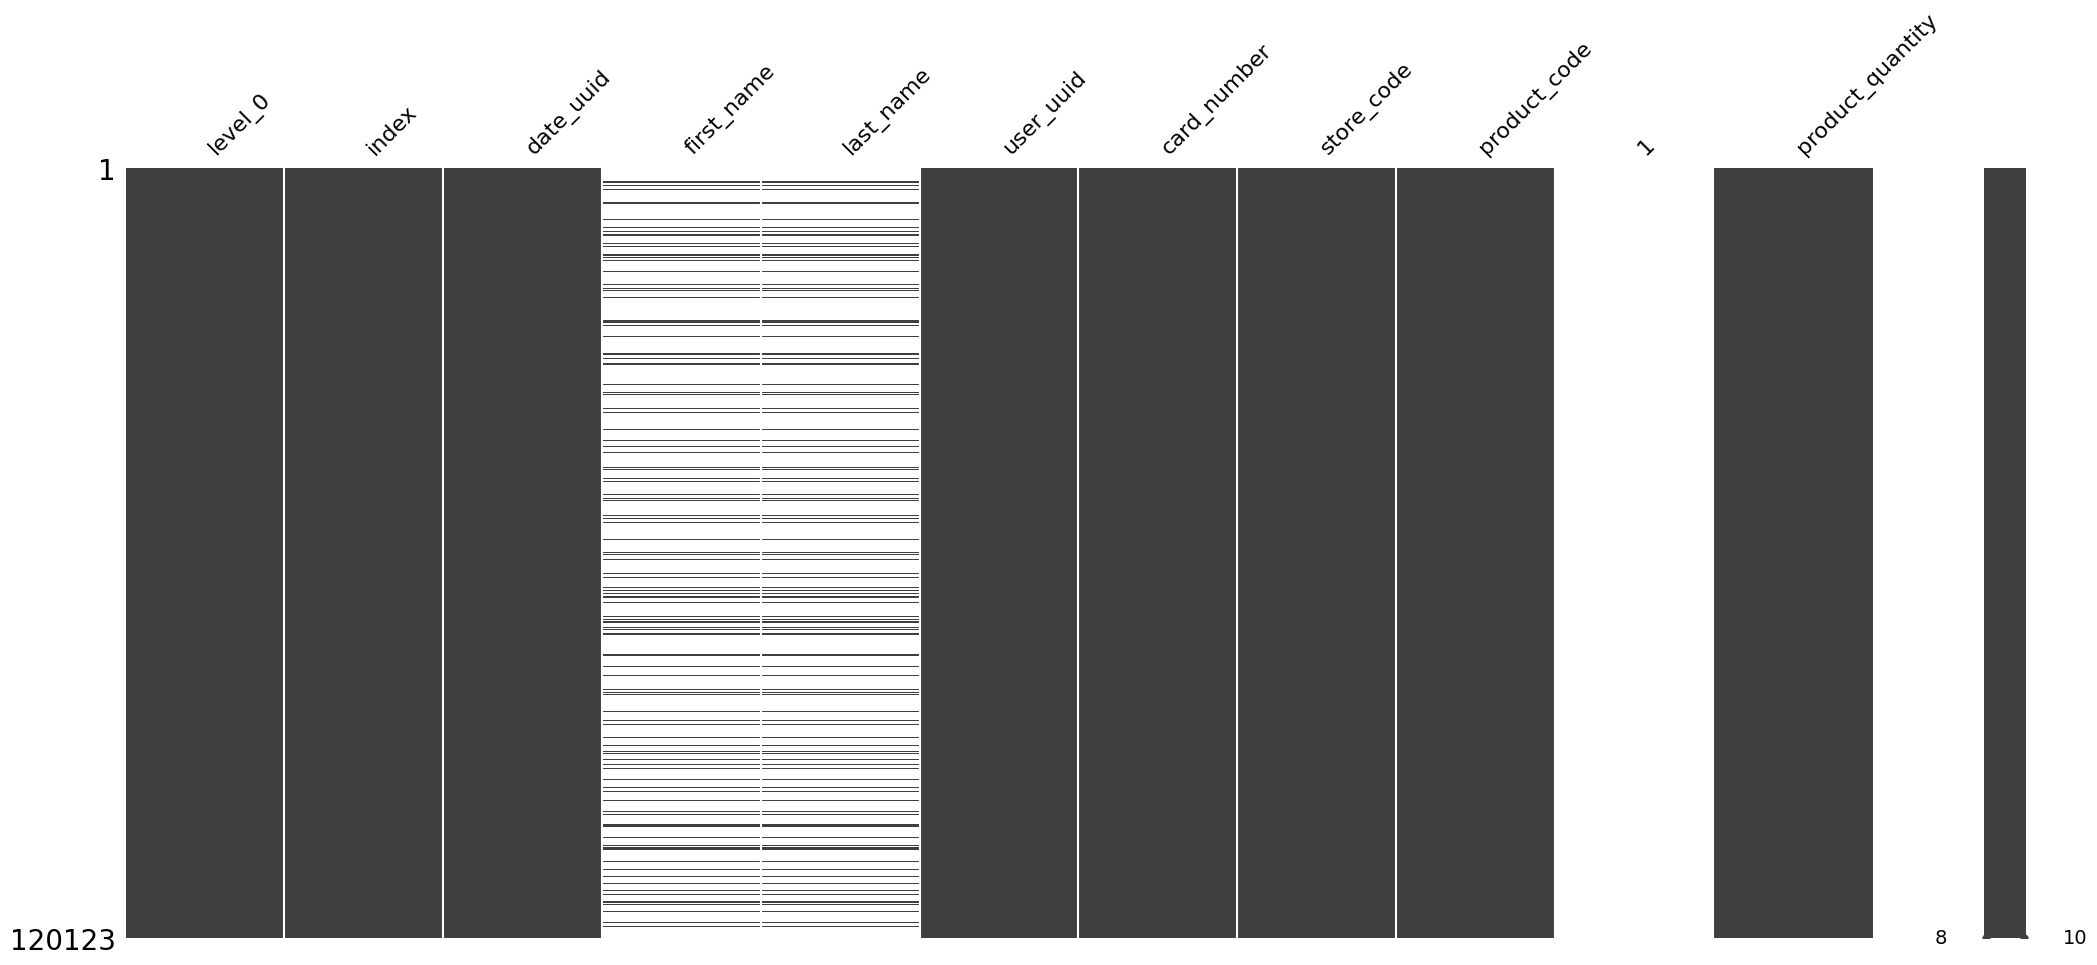

In [7]:
# Visualising Missing Data
import missingno as msno

msno.matrix(orders_table_df)

In [8]:
# Drop specified columns from the copy
columns_to_drop = ['first_name', 'last_name', '1']
orders_table_df = orders_table_df.drop(columns=columns_to_drop)

print("Original DataFrame:\n")
display(orders_table_df_original)

print("Upto date DataFrame:\n")
display(orders_table_df)

Original DataFrame:



,level_0,index,date_uuid,first_name,last_name,user_uuid,card_number,store_code,product_code,1,product_quantity
0,0,0,9476f17e-5d6a-4117-874d-9cdb38ca1fa6,None,None,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8,30060773296197,BL-8387506C,R7-3126933h,NaN,3
1,1,1,0423a395-a04d-4e4a-bd0f-d237cbd5a295,None,None,8fe96c3a-d62d-4eb5-b313-cf12d9126a49,349624180933183,WEB-1388012W,C2-7287916l,NaN,2
2,2,2,65187294-bb16-4519-adc0-787bbe423970,None,None,fc461df4-b919-48b2-909e-55c95a03fe6b,3529023891650490,CH-01D85C8D,S7-1175877v,NaN,2
3,3,3,579e21f7-13cb-436b-83ad-33687a4eb337,None,None,6104719f-ef14-4b09-bf04-fb0c4620acb0,213142929492281,CL-C183BE4B,D8-8421505n,NaN,2
4,4,4,00ab86c3-2039-4674-b9c1-adbcbbf525bd,None,None,9523a6d3-b2dd-4670-a51a-36aebc89f579,502067329974,SO-B5B9CB3B,B6-2596063a,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
120118,110549,110548,f0e8fff6-9998-4661-954b-0e258e09d33c,None,None,95c74b0a-d495-4359-b1c0-e2da511e8403,575421945446,KA-FA7ED3B8,C9-6827622o,NaN,4
120119,82164,82164,1c80940a-d186-4ba9-9daa-8abd1aceae32,None,None,5d6fa6fe-e583-4baf-8bbb-d1dd6e2b551f,4971858637664481,WA-A41DA979,I0-1146408B,NaN,1
120120,97599,97599,58598aca-049c-418e-8e39-46327634a7f1,Sharon,Miller,48b7f1fc-db13-4611-ad8e-3dac0b759488,4971858637664481,WEB-1388012W,A4-5443400b,NaN,4
120121,106591,106591,3a76f661-0707-4fbc-9862-f21d3249f581,None,None,51c0b538-7ded-4697-8e84-9f7aa13f9112,4971858637664481,SO-6D328417,E9-2782979e,NaN,4


Upto date DataFrame:



,level_0,index,date_uuid,user_uuid,card_number,store_code,product_code,product_quantity
0,0,0,9476f17e-5d6a-4117-874d-9cdb38ca1fa6,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8,30060773296197,BL-8387506C,R7-3126933h,3
1,1,1,0423a395-a04d-4e4a-bd0f-d237cbd5a295,8fe96c3a-d62d-4eb5-b313-cf12d9126a49,349624180933183,WEB-1388012W,C2-7287916l,2
2,2,2,65187294-bb16-4519-adc0-787bbe423970,fc461df4-b919-48b2-909e-55c95a03fe6b,3529023891650490,CH-01D85C8D,S7-1175877v,2
3,3,3,579e21f7-13cb-436b-83ad-33687a4eb337,6104719f-ef14-4b09-bf04-fb0c4620acb0,213142929492281,CL-C183BE4B,D8-8421505n,2
4,4,4,00ab86c3-2039-4674-b9c1-adbcbbf525bd,9523a6d3-b2dd-4670-a51a-36aebc89f579,502067329974,SO-B5B9CB3B,B6-2596063a,2
...,...,...,...,...,...,...,...,...
120118,110549,110548,f0e8fff6-9998-4661-954b-0e258e09d33c,95c74b0a-d495-4359-b1c0-e2da511e8403,575421945446,KA-FA7ED3B8,C9-6827622o,4
120119,82164,82164,1c80940a-d186-4ba9-9daa-8abd1aceae32,5d6fa6fe-e583-4baf-8bbb-d1dd6e2b551f,4971858637664481,WA-A41DA979,I0-1146408B,1
120120,97599,97599,58598aca-049c-418e-8e39-46327634a7f1,48b7f1fc-db13-4611-ad8e-3dac0b759488,4971858637664481,WEB-1388012W,A4-5443400b,4
120121,106591,106591,3a76f661-0707-4fbc-9862-f21d3249f581,51c0b538-7ded-4697-8e84-9f7aa13f9112,4971858637664481,SO-6D328417,E9-2782979e,4


# Check for duplicated rows

In [9]:
duplicates = orders_table_df.duplicated()
print(orders_table_df[duplicates])

Empty DataFrame
Columns: [level_0, index, date_uuid, user_uuid, card_number, store_code, product_code, product_quantity]
Index: []
